**Single layer perceptron**

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = load_breast_cancer()
X = data.data
y = data.target
class_names = data.target_names

In [21]:
class_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
perc = Perceptron(max_iter=1000, eta0=0.01, random_state=42)
perc.fit(X_train_scaled, y_train)

Perceptron(eta0=0.01, random_state=42)

In [ ]:
y_pred = perc.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9649122807017544


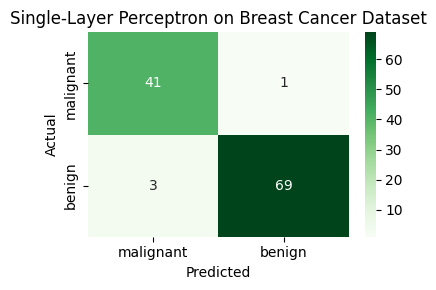

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Single-Layer Perceptron on Breast Cancer Dataset")
plt.tight_layout()
plt.show()

**Multi layer perceptron**

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(16, 8),activation='relu',solver='adam',max_iter=500,random_state=42)

In [ ]:
mlp.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=500, random_state=42)

In [ ]:
y_pred = mlp.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.956140350877193


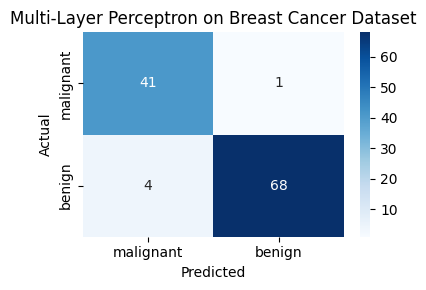

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Multi-Layer Perceptron on Breast Cancer Dataset")
plt.tight_layout()
plt.show()